<a href="https://colab.research.google.com/github/Mostafa1492/AMS-/blob/main/Second_task_face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install kaggle


In [68]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [69]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [70]:
!kaggle datasets download -d andrewmvd/face-mask-detection


100% 397M/398M [00:14<00:00, 34.1MB/s]
100% 398M/398M [00:14<00:00, 29.0MB/s]


In [83]:
!kaggle datasets download -d andrewmvd/face-mask-detection -p andrewmvd/face-mask-detection



 99% 395M/398M [00:13<00:00, 34.1MB/s]
100% 398M/398M [00:13<00:00, 29.9MB/s]


In [87]:
!unzip /content/face-mask-detection.zip





Archive:  /content/face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksksss115.xml  
  inflating: annotation

In [147]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [157]:
data_folder = '/content/andrewmvd/face-mask-detection'
root_folder = './'

In [158]:
import xml.etree.ElementTree as ET

def get_objects(xml_file):
  annotation = ET.parse(xml_file)
  root = annotation.getroot()

  objects = []
  for obj in root.findall('object'):
    new_object = {'name': obj.find('name').text}
    bbox_tree = obj.find('bndbox')
    new_object['bbox'] = (int(bbox_tree.find('xmin').text),
                          int(bbox_tree.find('ymin').text),
                          int(bbox_tree.find('xmax').text),
                          int(bbox_tree.find('ymax').text),
                          )
    #TODO: fill the 4 dimensional vector with the coordinates.
    print(new_object)
    objects.append(new_object)

  return objects

{'name': 'without_mask', 'bbox': (42, 109, 66, 140)}
{'name': 'without_mask', 'bbox': (2, 105, 22, 125)}
{'name': 'without_mask', 'bbox': (30, 88, 46, 105)}
{'name': 'with_mask', 'bbox': (133, 108, 174, 152)}
{'name': 'with_mask', 'bbox': (221, 101, 256, 139)}
{'name': 'without_mask', 'bbox': (304, 131, 331, 158)}
{'name': 'without_mask', 'bbox': (83, 85, 96, 96)}
{'name': 'without_mask', 'bbox': (167, 91, 180, 108)}


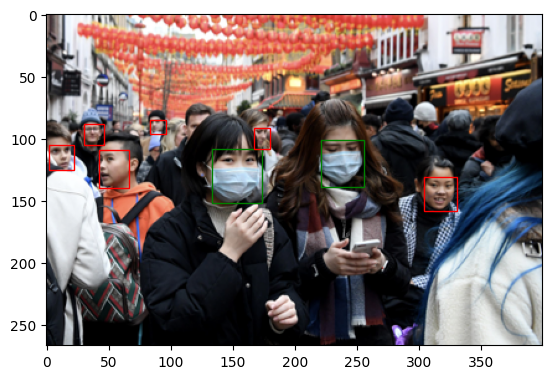

In [164]:
classes_color = {'with_mask':'g', 'without_mask':'r', 'mask_weared_incorrect':'tab:orange'}
classes_index = {'with_mask':1, 'without_mask':2, 'mask_weared_incorrect':3} #Careful!! 0 is for background!!

def show_bboxes(image, objects):
  fig,ax = plt.subplots(1)
  ax.imshow(image)

  for annotation in objects:
    xmin, ymin, xmax, ymax = annotation['bbox']
    rect = patches.Rectangle((xmin,ymin), (xmax-xmin), (ymax-ymin), linewidth=1, edgecolor=classes_color[annotation['name']], facecolor='none')
    ax.add_patch(rect)
  plt.show()

index = 104
objects = get_objects(os.path.join( 'annotations', 'maksssksksss' + str(index) + '.xml'))
image = plt.imread(os.path.join( 'images', 'maksssksksss' + str(index) + '.png'))
show_bboxes(image, objects)